C:\Users\akash\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\akash\AppData\Local\Temp\ipykernel_15464\372407346.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_titles = df.resample('M', on='date_added').size()


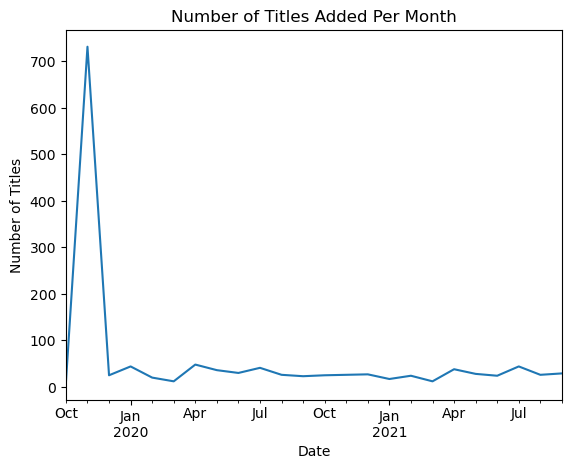

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


2021-10-31    30.344163
2021-11-30    29.586512
2021-12-31    30.013570
2022-01-31    29.772855
2022-02-28    29.908536
2022-03-31    29.832058
2022-04-30    29.875165
2022-05-31    29.850867
2022-06-30    29.864563
2022-07-31    29.856843
2022-08-31    29.861195
2022-09-30    29.858742
Freq: ME, Name: predicted_mean, dtype: float64


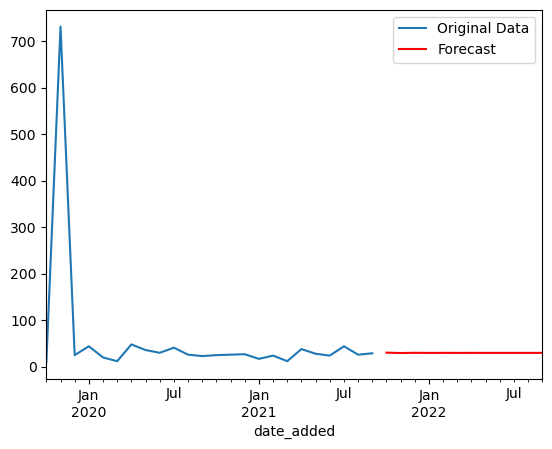

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


df = pd.read_csv('disney_plus_titles.csv')

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Group by month and count titles
monthly_titles = df.resample('M', on='date_added').size()

# Plot the monthly counts
monthly_titles.plot(title='Number of Titles Added Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.show()

# Fit ARIMA model
model = ARIMA(monthly_titles, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=12)
print(forecast)

# Plot the forecast
monthly_titles.plot(label='Original Data')
forecast.plot(label='Forecast', color='red')
plt.legend()
plt.show()


                               title  \
0                      A Spark Story   
1                     Spooky Buddies   
2             The Fault in Our Stars   
3                    Dog: Impossible   
4     Spidey And His Amazing Friends   
...                              ...   
1363          The Sword in the Stone   
1364                 Those Calloways   
1365            Disney Kirby Buckets   
1366                  Disney Mech-X4   
1367              Imagination Movers   

                                            description  sentiment  
0     Two Pixar filmmakers strive to bring their uni...      0.000  
1     The puppies go on a spooky adventure through a...      0.000  
2     Hazel and Gus share a love that sweeps them on...      0.650  
3     Matt Beisner uses unique approaches to modifyi...      0.375  
4     Spidey teams up with pals to become The Spidey...      0.000  
...                                                 ...        ...  
1363  Merlin trains a young orphan w

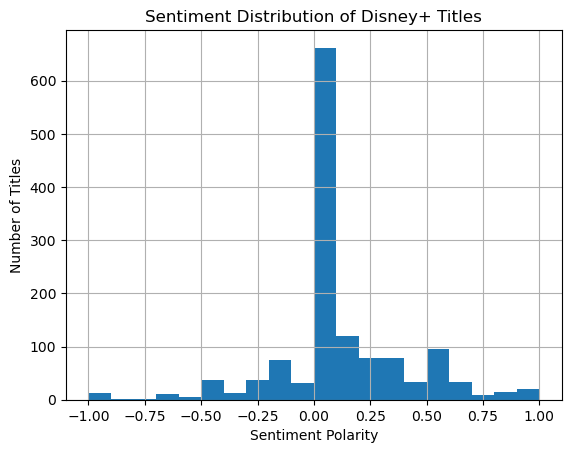

In [3]:
from textblob import TextBlob

# Drop rows with missing descriptions
df = df.dropna(subset=['description'])

# Perform sentiment analysis
df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display sentiment analysis results
print(df[['title', 'description', 'sentiment']])

# Plot the sentiment distribution
df['sentiment'].hist(bins=20)
plt.title('Sentiment Distribution of Disney+ Titles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Titles')
plt.show()


C:\Users\akash\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                            title                             listed_in  \
0                   A Spark Story                           Documentary   
1                  Spooky Buddies                 Comedy, Fantasy, Kids   
2          The Fault in Our Stars         Coming of Age, Drama, Romance   
3                 Dog: Impossible  Animals & Nature, Docuseries, Family   
4  Spidey And His Amazing Friends     Action-Adventure, Animation, Kids   

   cluster  
0        1  
1        4  
2        2  
3        1  
4        0  


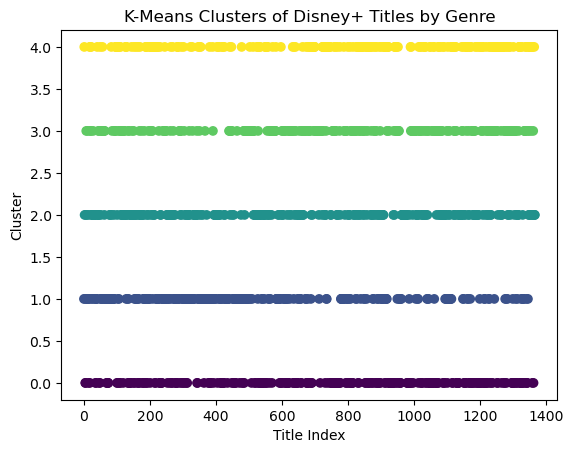

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop rows with missing 'listed_in'
df = df.dropna(subset=['listed_in'])

# Vectorize the genres
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(df['listed_in'])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

# Display the first few rows with cluster labels
print(df[['title', 'listed_in', 'cluster']].head())

# Plot the clusters (Note: This plot is simplified for illustration purposes)
plt.scatter(df.index, df['cluster'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clusters of Disney+ Titles by Genre')
plt.xlabel('Title Index')
plt.ylabel('Cluster')
plt.show()
